# Week 02 Assignment glucose level data


Missing data occurs commonly in many data applications. Especially wearable sensor devices encounter measurement errors resulting in missing data. Although pandas can handle missing data, for instance, to exclude missing data in the descriptive analysis, we might decide to reshape our data to improve quality. We might consider excluding certain rows, columns, or decide to impute our data if we take an argumentative approach. This week we will work with sensor data of a semester 01 project. The data is timeseries related but a lot of sensor errors occurred. First, we inspect the quality data. Then we will work with imputation, interpolation, and smoothing techniques to overcome this issue of the error readings. Finaly we plot the data. Visualization is a method to translate data into information. As a data scientist you should be able to choose an appropiate visualizations. 


Keywords: data loading, data inspection, data exploration, data cleaning, impute data, missing data, timeseries, pandas, visualization, interactive plots, overflow/underflow error

More to read
- https://fennaf.gitbook.io/bfvm22prog1/
- https://towardsdatascience.com/how-to-analyze-blood-glucose-data-with-python-data-science-packages-4f160f9564be


More about pandas and bokeh programming
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
- https://rubberduckdebugging.com/
- https://docs.bokeh.org/en/latest/docs/gallery.html


Learning objectives

- Further practice numpy / pandas
- Read, inspect, clean, and impute JSON data. Handle missing data
- Apply different interpolation/smoothing techniques
- Recognize overflow/underflow error
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles


Note: you can bring your own sensor data, but for the practical you need some missing data points. 

By the end of this week the student can:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

please add your own topics you want to learn here: https://padlet.com/ffeenstra1/69vbvy0l8t32rq55


The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome. 

Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [1]:
'''Author: Juana Karina Diaz Barba'''

import pandas as pd
import numpy as np
import yaml
import json
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
output_notebook()

# Set the config file
def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()
file = open(config['filepath_glucose'])

# Loading and reading file
json = json.load(file)
df = pd.read_json(json)
df.head(5)

Loading BokehJS ...

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


#### Expected outcome: 

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe. The `glucose` field should be an integer, the `time` field should have a datetime format. If the datatypes are different you should typecast them to the right format.
Make sure that your dataset is sorted by the time column


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [2]:
# Changing data types
df.glucose = pd.to_numeric(df.glucose, errors= 'coerce')
df.time = pd.to_datetime(df.time)
print(df.info())

# Setting the index
df = df.set_index(['time']).sort_index().reset_index()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          136 non-null    float64       
 1   time        136 non-null    datetime64[ns]
 2   recordtype  136 non-null    int64         
 3   glucose     52 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.4 KB
None


,time,ID,recordtype,glucose
0,2019-04-25 00:08:00,2.845000e+03,1,109.0
1,2019-04-25 00:14:00,1.614305e+19,0,NaN
2,2019-04-25 00:29:00,1.614305e+19,0,NaN


#### Expected outcome: 

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You can answer the questions below but feel free to explore the data further by plotting and or statistics, group by overviews and so on. 

To be answered at least:
- what is the quantity of the data (observations and features)
- what is the percentage missing data for glucose?
- is there a specific pattern for glucose value and recordtype?
- what is the time range?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

Observations: 136. Feautures: 4

Glucose summary
 count     52.000000
mean     123.403846
std       20.734796
min       86.000000
25%      109.750000
50%      121.500000
75%      129.000000
max      184.000000
Name: glucose, dtype: float64

Glucose missing data: 61.7647% [84/136]

First measurement. Day: 25, Apr 2019. Time:00:08:00
First measurement. Day: 25, Apr 2019. Time:23:48:00


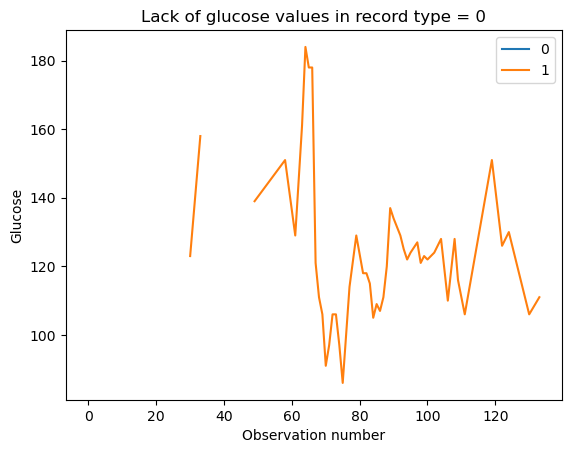

In [3]:
# Observations and features 
print(f'Observations: {df.shape[0]}. Feautures: {df.shape[1]}')

# Missing data
print('\nGlucose summary\n', df.glucose.describe())

row_number = df.shape[0]
missing_glucose = (df.glucose.isna().sum()/row_number)
print('\nGlucose missing data: {:2.4%} [{:}/{:}]'.format(missing_glucose,
    df.glucose.isna().sum(), row_number))

# Pattern in recordtype
df.groupby('recordtype')['glucose'].plot(legend=True, kind='line',
                                        xlabel='Observation number',
                                        ylabel='Glucose',
                                        title='Lack of glucose values in record type = 0')
#The are no glucose values when record type is equal to cero

# Time range
print(df.time.min().strftime('\nFirst measurement. Day: %d, %b %Y. Time:%H:%M:%S'))
print(df.time.max().strftime('First measurement. Day: %d, %b %Y. Time:%H:%M:%S'))



    #### Expected outcome percentage missing data
0.6176470588235294

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

In [4]:
# Set index to time so that time interpolation can be perfomed
df.set_index(['time'], inplace=True, drop=False)
df.head()

# Linear interpolation
inter_glucose = df.glucose.interpolate()
df['linear'] = inter_glucose

# 2nd degree polynomial interpolation
inter_glucose_pol = df.glucose.interpolate(method = 'polynomial', order = 2)
df['inter_pol2'] = inter_glucose_pol

# 3rd degree polynomial interpolation
inter_glucose_pol = df.glucose.interpolate(method = 'polynomial', order = 3)
df['inter_pol3'] = inter_glucose_pol

# Time interpolation
inter_glucose_time = df.glucose.interpolate(method = 'time')
df['inter_time'] = inter_glucose_time

print(df.head())
print("- Linear. Min:", df.linear.min(), "Max:", df.linear.max())
print("- 2nd pol. Min:", df.inter_pol2.min(), "Max:", df.inter_pol2.max())
print("- 3nd pol. Min:", df.inter_pol3.min(), "Max:", df.inter_pol3.max())
print("- Time. Min:", df.inter_time.min(), "Max:", df.inter_time.max())

# By having a look into the minimun and maximum interpolation glucose values 
# the ones that make more sense biologicaly are the ones obtained by 2nd degree 
# polynomial, the linear and the time interpolation. With a medical point of 
# view, there shoudln't be glucose values as low as in the 3rd degree polynomial
# interpolation.


                                   time            ID  recordtype  glucose  \
time                                                                         
2019-04-25 00:08:00 2019-04-25 00:08:00  2.845000e+03           1    109.0   
2019-04-25 00:14:00 2019-04-25 00:14:00  1.614305e+19           0      NaN   
2019-04-25 00:29:00 2019-04-25 00:29:00  1.614305e+19           0      NaN   
2019-04-25 00:44:00 2019-04-25 00:44:00  1.614305e+19           0      NaN   
2019-04-25 00:50:00 2019-04-25 00:50:00  2.850000e+03           1      NaN   

                         linear  inter_pol2  inter_pol3  inter_time  
time                                                                 
2019-04-25 00:08:00  109.000000  109.000000  109.000000  109.000000  
2019-04-25 00:14:00  109.466667  102.940062   77.574929  109.202899  
2019-04-25 00:29:00  109.933333   88.596098    6.048434  109.710145  
2019-04-25 00:44:00  110.400000   75.403390  -55.814560  110.217391  
2019-04-25 00:50:00  110.866667  

#### Example outcome

<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. Provide argumentation for the plot of choice. 

Mind you, there are several types of plots. The most used are: 
- Compare values->	Bar, boxplot, violin plot, scatter, line. 
- Show composition-> Stacked bar, pie, mosaic, area, burtin.
- Show distribution-> 	Histogram, density, qqplot, bubble. 
- Analyzing trend-> Line, bar, dual axis 
- Relations-> Scatter, heatmap


### Code your solution

In [5]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot, row
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource
output_notebook()


Loading BokehJS ...

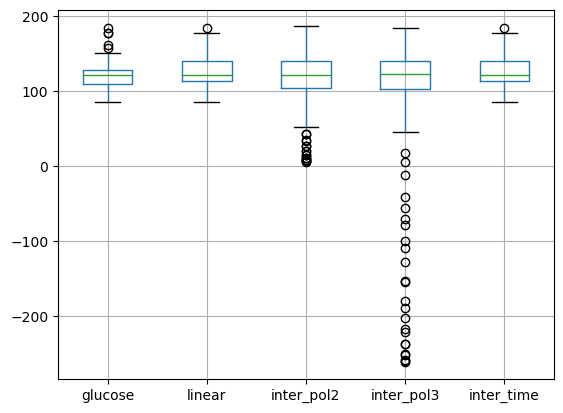

In [40]:
#Boxplot to visualise the mean, and quartiles of the data
boxplot = df.boxplot(column=['glucose','linear', 'inter_pol2','inter_pol3',
                             'inter_time'])  
boxplot


# Scatterplots
# Scatterplots were chose to show the trend of the glucose values through time 
# and have a better visualisation of  the interpolated and real values 

def scatter_plot(x, y, y_inter, title):
    '''Function to plot the glucose levels and the interpolated values'''
    p = figure(title = title,  x_axis_type='datetime')
    p.scatter(x=df[x], y=df[y_inter], color='dodgerblue',legend_label='Interpolated')
    p.scatter(x=df[x], y=df[y], color='deeppink',legend_label='Real')

    p.line(x=df[x], y=df[y_inter], color='royalblue')
    
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Glucose level'
    p.grid.grid_line_color="black"
    return(p)
    
    
p1 = scatter_plot(x='time', y='glucose', y_inter='linear', title = 'Linear Regression')
p3 = scatter_plot(x='time', y='glucose', y_inter='inter_time', title = 'Time')
p2 = scatter_plot(x='time', y='glucose', y_inter='inter_pol2', title = '2nd degree polynomial')
p4 = scatter_plot(x='time', y='glucose', y_inter='inter_pol3', title = '3rd degree polynomial')

show(gridplot([p1,p3, p2, p4], ncols=2, width=500, height=500))

# By taking into account the shape of the curve, the interpolation that is
# more similar to the reported glucose curve through the day is  the linear 
# regression and time (see plots below). We can see that there are peaks of 
# glucose after breakfast, lunch and dinner time. Results that match with what 
# is reported on the literature. 

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [44]:
def rolling_plot(method, window):
    '''Function to apply the rolling mean method to the interpolated glucose values'''
    # Interpolating
    method_roll = method + "_roll"
    df[method_roll] = df[method].rolling(window).mean()
    
    # Plotting
    p = figure(title = method_roll,  x_axis_type='datetime')
    p.scatter(x=df['time'], y=df[method], color='deeppink',legend_label='Interpolated')
    p.scatter(x=df['time'], y=df[method_roll], color='dodgerblue',legend_label='Rolling mean')

    p.line(x=df['time'], y=df[method_roll], color='royalblue')
    p.line(x=df['time'], y=df[method], color='deeppink')
    
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Glucose level'
    p.grid.grid_line_color="black"
    return(p)


p5 = rolling_plot(method = 'linear', window =4)
p6 = rolling_plot(method = 'inter_pol2', window =4)
p7 = rolling_plot(method = 'inter_pol3', window =4)
p8 = rolling_plot(method = 'inter_time', window =4)

show(gridplot([p5,p6, p7, p8], ncols=2, width=500, height=500))

In [31]:
import panel as pn
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
output_notebook()
pn.extension()


Loading BokehJS ...

In [42]:
methods_list = ['linear', 'inter_pol2','inter_pol3','inter_time']
inter_plot = pn.interact(rolling_plot, method=methods_list, window=4)
inter_plot

Column
    [0] Column
        [0] Select(name='method', options=['linear', 'inter_pol2', ...], value='linear')
        [1] IntSlider(end=12, name='window', start=-4, value=4)
    [1] Row
        [0] Bokeh(Figure, name='interactive00132')

In [138]:
dashboard = pn.template.BootstrapTemplate(title='Title', sidebar_with = 200)

dashboard.sidebar.append(inter_plot[0])
dashboard.main.append(inter_plot[1])
dashboard.show()

Launching server at http://localhost:39275


Missing chrome or resource URL: resource://gre/modules/UpdateListener.jsm
Missing chrome or resource URL: resource://gre/modules/UpdateListener.sys.mjs
